# 🤖 Creación de los modelos - Factores de anemia

- Miguel Angel Vélez Suarez
- Samuel Pérez Hurtado

1. Importar los datos preparados
2. División 70-30
3. Aprendizaje de los modelos y evaluación
4. Hiperparametrización de los 3 mejores modelos
5. Guardar el mejor modelo

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica
import pickle # guardar modelos

# 1. Importar los datos

In [2]:
data = pd.read_csv('data/datos_preparados.csv')
data.head()

,Age in 5-year groups,Type of place of residence,Wealth index combined,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,When child put to breast,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,25-29,Urban,Richest,95.0,Moderate,Yes,No,105.000000,No,No
1,30-34,Urban,Richest,113.0,Mild,Yes,No,51.335329,No,No
2,35-39,Urban,Richest,121.0,Not anemic,Yes,No,0.000000,No,Yes
3,35-39,Urban,Richest,121.0,Not anemic,Yes,No,51.335329,No,No
4,20-24,Urban,Richest,108.0,Moderate,Yes,No,0.000000,No,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13136 entries, 0 to 13135
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   13136 non-null  object 
 1   Type of place of residence                                             13136 non-null  object 
 2   Wealth index combined                                                  13136 non-null  object 
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null  float64
 4   Anemia level                                                           13136 non-null  object 
 5   Have mosquito bed net for sleeping (from household questionnaire)      13136 non-null  object 
 6   Smokes cigarettes                                                      13136 non-null 

In [4]:
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Anemia level"] = labelencoder.fit_transform(data["Anemia level"])
data.head()

,Age in 5-year groups,Type of place of residence,Wealth index combined,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,When child put to breast,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,25-29,Urban,Richest,95.0,1,Yes,No,105.000000,No,No
1,30-34,Urban,Richest,113.0,0,Yes,No,51.335329,No,No
2,35-39,Urban,Richest,121.0,2,Yes,No,0.000000,No,Yes
3,35-39,Urban,Richest,121.0,2,Yes,No,51.335329,No,No
4,20-24,Urban,Richest,108.0,1,Yes,No,0.000000,No,Yes


# 2. División 70-30

<Axes: xlabel='Anemia level'>

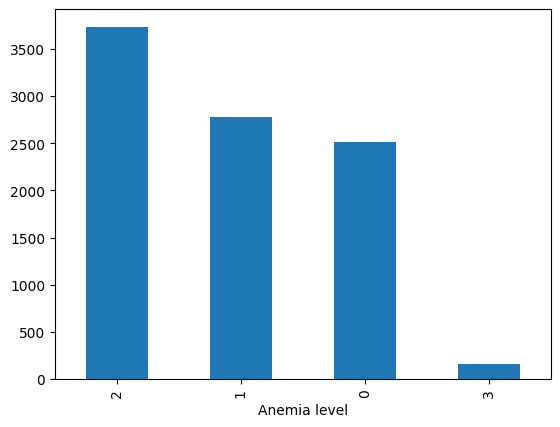

In [5]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Anemia level", axis = 1) # Variables predictoras
Y = data['Anemia level'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')# Objetivo del 70%

## 2.1. Balanceo del 70%

In [6]:
# Se instala la librería imblearn para balancear los datos
# !pip install imblearn

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9195 entries, 1298 to 12331
Data columns (total 9 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   9195 non-null   object 
 1   Type of place of residence                                             9195 non-null   object 
 2   Wealth index combined                                                  9195 non-null   object 
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  9195 non-null   float64
 4   Have mosquito bed net for sleeping (from household questionnaire)      9195 non-null   object 
 5   Smokes cigarettes                                                      9195 non-null   object 
 6   When child put to breast                                               9195 non-null   flo

In [8]:
from imblearn.over_sampling import SMOTENC

# Identificar las columnas categóricas y numéricas
categorical_cols = ['Age in 5-year groups', 'Type of place of residence', 'Wealth index combined', 
                    'Have mosquito bed net for sleeping (from household questionnaire)', 'Smokes cigarettes', 
                    'Had fever in last two weeks', 'Taking iron pills, sprinkles or syrup']
numerical_cols = ['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']

# Crear una lista de booleanos para indicar si una columna es categórica (True) o no (False)
categorical_features = [True if col in categorical_cols else False for col in X_train.columns]

# Usar SMOTENC para balancear las variables categóricas y numéricas
sm = SMOTENC(categorical_features=categorical_features, random_state=42, k_neighbors=2)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

<Axes: xlabel='Anemia level'>

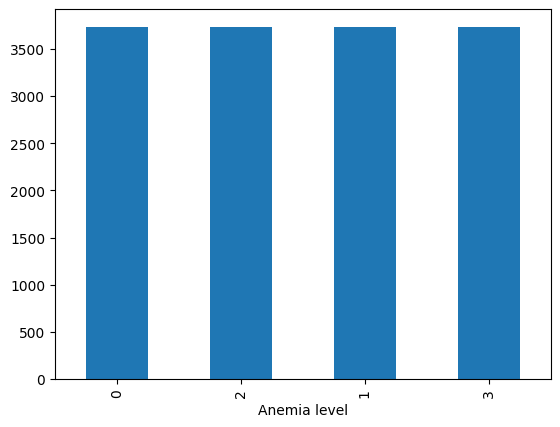

In [9]:
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='Anemia level'>

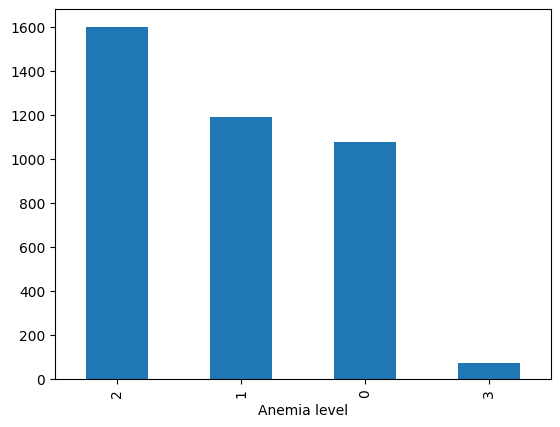

In [10]:
Y_test.value_counts().plot(kind='bar')

## 2.2. Dummies

In [11]:
X_train = pd.get_dummies(X_train, drop_first=True, dtype='int64')
X_test = pd.get_dummies(X_test, drop_first=True, dtype='int64')

In [12]:
X_train.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
0,118.0,0.000000,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
1,118.0,51.335329,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,123.0,0.000000,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,103.0,51.335329,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1
4,133.0,0.000000,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [13]:
X_test.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
5397,122.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
836,113.0,0.0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
8032,102.0,0.0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0
3785,104.0,60.0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
5685,129.0,105.0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0


# 3. Aprendizaje de los modelos y evaluación

- Árbol de decisión
- KNN
- Redes neuronales
- SVM
- Random Forest
- XGBoost
- Stacking

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns

def evaluacion_modelos(model, X_test, y_test):

    y_test_pred = model.predict(X_test)  #Estas son las salidas generadas por el modelo (TEÓRICAS)

    print("******* Resultados de evaluación*******")

    clf_report = pd.DataFrame(classification_report(y_test,y_test_pred,output_dict=True))

    conf = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(conf, annot=True, fmt='d')
    
    precision = precision_score(y_test, y_test_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_test_pred, average='weighted')
    exactitud = accuracy_score(y_test, y_test_pred)
    f1score = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Precisión: {precision}")
    print(f"Sensibilidad: {sensibilidad}")
    print(f"Exactitud: {exactitud}")
    print(f"F1_Score: {f1score}")

    print(clf_report)
    
    return precision, sensibilidad, exactitud, f1score

## 3.1. Árbol de decisión

In [15]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=10) #gini, entropy

scores = cross_validate(modelTree, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

,fit_time,score_time,test_f1_weighted,test_accuracy,test_precision_weighted,test_recall_weighted
0,0.029727,0.013072,0.944228,0.943813,0.946150,0.943813
1,0.023132,0.007321,0.944436,0.944482,0.946230,0.944482
2,0.020888,0.007123,0.926755,0.926421,0.930049,0.926421
3,0.019542,0.007129,0.947117,0.947157,0.949019,0.947157
4,0.020109,0.007301,0.945680,0.945783,0.947416,0.945783
5,0.025303,0.007447,0.940229,0.940428,0.942613,0.940428
6,0.025260,0.009270,0.945927,0.945783,0.947456,0.945783
7,0.024573,0.010777,0.951400,0.951138,0.952952,0.951138
8,0.024630,0.012621,0.962583,0.962517,0.963164,0.962517
9,0.023160,0.007206,0.957100,0.957162,0.958438,0.957162


In [16]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

Promedio F1 Score: 0.95
Promedio Accuracy: 0.95
Promedio Precision: 0.95
Promedio Recall: 0.95


In [17]:
# Entrenamiento del modelo con el 70%
modelTree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

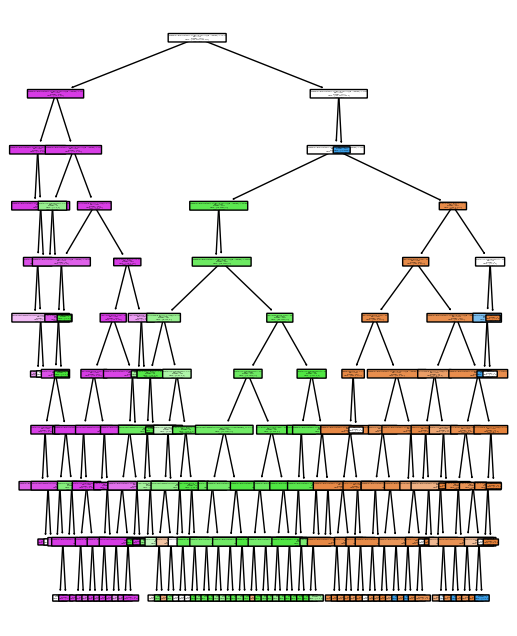

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

******* Resultados de evaluación*******
Precisión: 0.9296393671226859
Sensibilidad: 0.9266683582846993
Exactitud: 0.9266683582846993
F1_Score: 0.9268874564373485
                     0            1            2          3  accuracy  \
precision     0.893100     0.880394     0.996029   0.812500  0.926668   
recall        0.852505     0.975671     0.940037   0.928571  0.926668   
f1-score      0.872330     0.925587     0.967224   0.866667  0.926668   
support    1078.000000  1192.000000  1601.000000  70.000000  0.926668   

             macro avg  weighted avg  
precision     0.895506      0.929639  
recall        0.924196      0.926668  
f1-score      0.907952      0.926887  
support    3941.000000   3941.000000  


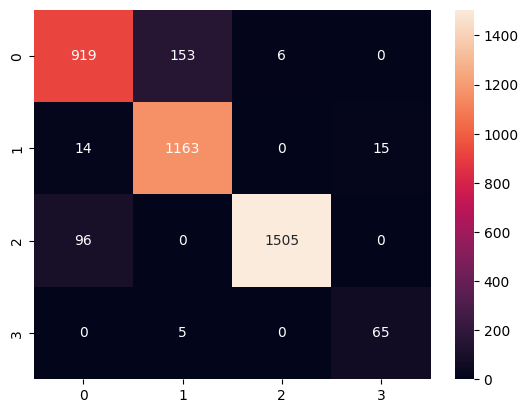

In [19]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelTree, X_test, Y_test)

medidas = pd.DataFrame(index=['Precisión', 'Sensibilidad', 'Exactitud', 'F1_Score'])
medidas['DecisionTree'] = [precision, sensibilidad, exactitud, f1score]

In [20]:
medidas

,DecisionTree
Precisión,0.929639
Sensibilidad,0.926668
Exactitud,0.926668
F1_Score,0.926887


## 3.2. KNN

In [21]:
# Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])

#Se aplica la normalización al 70% y 30%
X_train[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']]= min_max_scaler.transform(X_train[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])
X_test[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']]= min_max_scaler.transform(X_test[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])
X_train.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
0,0.700000,0.000000,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
1,0.700000,0.230203,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,0.735714,0.000000,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,0.592857,0.230203,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1
4,0.807143,0.000000,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [22]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier
modelKnn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')#euclidean, minkowski

scores = cross_validate(modelKnn, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

,fit_time,score_time,test_f1_weighted,test_accuracy,test_precision_weighted,test_recall_weighted
0,0.004719,0.135552,0.799144,0.797324,0.803236,0.797324
1,0.006355,0.098421,0.789560,0.787960,0.794089,0.787960
2,0.005664,0.096421,0.785073,0.783946,0.788209,0.783946
3,0.005635,0.097669,0.810653,0.809365,0.814043,0.809365
4,0.005550,0.097545,0.813866,0.812584,0.820996,0.812584
5,0.007275,0.100309,0.809586,0.807229,0.816159,0.807229
6,0.005854,0.095223,0.817386,0.815261,0.827887,0.815261
7,0.005567,0.096292,0.879175,0.878179,0.886156,0.878179
8,0.005537,0.096976,0.909893,0.909639,0.915200,0.909639
9,0.006086,0.105782,0.892128,0.892236,0.899358,0.892236


In [23]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

Promedio F1 Score: 0.83
Promedio Accuracy: 0.83
Promedio Precision: 0.84
Promedio Recall: 0.83


In [24]:
# Entrenamiento del modelo con el 70%
modelKnn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

******* Resultados de evaluación*******
Precisión: 0.7555355572651827
Sensibilidad: 0.7343313879725958
Exactitud: 0.7343313879725958
F1_Score: 0.7407512178115307
                     0            1            2          3  accuracy  \
precision     0.569948     0.767161     0.886540   0.419355  0.734331   
recall        0.714286     0.693792     0.785759   0.557143  0.734331   
f1-score      0.634006     0.728634     0.833113   0.478528  0.734331   
support    1078.000000  1192.000000  1601.000000  70.000000  0.734331   

             macro avg  weighted avg  
precision     0.660751      0.755536  
recall        0.687745      0.734331  
f1-score      0.668570      0.740751  
support    3941.000000   3941.000000  


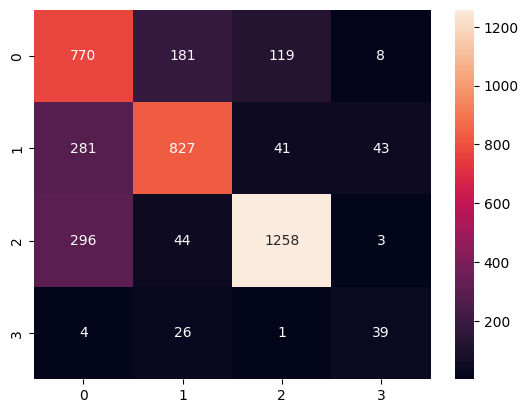

In [25]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelKnn, X_test, Y_test)

medidas['KNN'] = [precision, sensibilidad, exactitud, f1score]

## 3.3. Redes neuronales

In [26]:
#Red Neuronal
from sklearn.neural_network import MLPClassifier

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                        learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=42)

scores = cross_validate(modelNN, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

,fit_time,score_time,test_f1_weighted,test_accuracy,test_precision_weighted,test_recall_weighted
0,1.097426,0.007539,0.893780,0.894314,0.894099,0.894314
1,2.219413,0.007654,0.924781,0.925084,0.927945,0.925084
2,0.919716,0.007447,0.873872,0.874916,0.873805,0.874916
3,0.456375,0.007456,0.909211,0.910368,0.909426,0.910368
4,1.223540,0.007399,0.897735,0.896921,0.900593,0.896921
5,1.364926,0.007683,0.918917,0.919009,0.922530,0.919009
6,0.938377,0.007679,0.910129,0.909639,0.911522,0.909639
7,1.660191,0.007401,0.933003,0.932396,0.936109,0.932396
8,1.191989,0.007353,0.897179,0.898260,0.898709,0.898260
9,1.383487,0.007399,0.933247,0.933066,0.935851,0.933066


In [27]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

Promedio F1 Score: 0.91
Promedio Accuracy: 0.91
Promedio Precision: 0.91
Promedio Recall: 0.91


In [28]:
# Entrenamiento del modelo con el 70%
modelNN.fit(X_train, Y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=500, momentum=0.3,
              random_state=42)

******* Resultados de evaluación*******
Precisión: 0.8850494354525094
Sensibilidad: 0.8723674194366912
Exactitud: 0.8723674194366912
F1_Score: 0.8756974850208586
                     0            1            2          3  accuracy  \
precision     0.742424     0.876271     0.995757   0.698925  0.872367   
recall        0.863636     0.867450     0.879450   0.928571  0.872367   
f1-score      0.798456     0.871838     0.933997   0.797546  0.872367   
support    1078.000000  1192.000000  1601.000000  70.000000  0.872367   

             macro avg  weighted avg  
precision     0.828344      0.885049  
recall        0.884777      0.872367  
f1-score      0.850459      0.875697  
support    3941.000000   3941.000000  


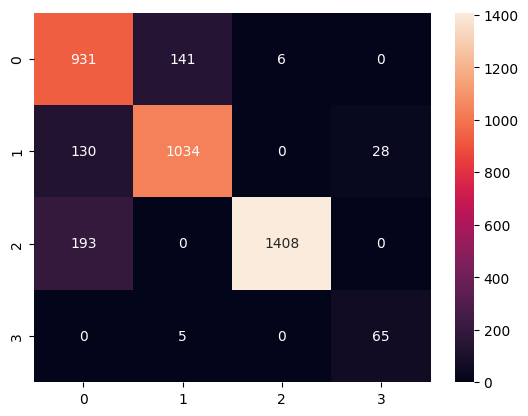

In [29]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelNN, X_test, Y_test)

medidas['Red Neuronal'] = [precision, sensibilidad, exactitud, f1score]

## 3.4. SVM

In [30]:
#SVM
from sklearn.svm import SVC #Classifier
modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

scores = cross_validate(modelSVM, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

,fit_time,score_time,test_f1_weighted,test_accuracy,test_precision_weighted,test_recall_weighted
0,1.780733,0.192343,0.918130,0.917726,0.920101,0.917726
1,1.639544,0.173574,0.912712,0.912375,0.914947,0.912375
2,1.578646,0.173384,0.898534,0.897659,0.903596,0.897659
3,1.678546,0.185798,0.914821,0.914381,0.916686,0.914381
4,1.634530,0.174635,0.911405,0.910977,0.914255,0.910977
5,1.658348,0.187792,0.910255,0.909639,0.913315,0.909639
6,1.688736,0.176034,0.912936,0.911647,0.917891,0.911647
7,1.571752,0.186133,0.932840,0.932396,0.935383,0.932396
8,1.668626,0.175783,0.935307,0.935074,0.937686,0.935074
9,1.635167,0.202546,0.930855,0.930388,0.933153,0.930388


In [31]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

Promedio F1 Score: 0.92
Promedio Accuracy: 0.92
Promedio Precision: 0.92
Promedio Recall: 0.92


In [32]:
# Entrenamiento del modelo con el 70%
modelSVM.fit(X_train, Y_train)

SVC(kernel='linear')

******* Resultados de evaluación*******
Precisión: 0.8915223758380875
Sensibilidad: 0.8817558995178889
Exactitud: 0.8817558995178889
F1_Score: 0.8845516607702515
                     0            1            2          3  accuracy  \
precision     0.779374     0.874138     0.993239   0.588235  0.881756   
recall        0.855288     0.850671     0.917552   1.000000  0.881756   
f1-score      0.815568     0.862245     0.953896   0.740741  0.881756   
support    1078.000000  1192.000000  1601.000000  70.000000  0.881756   

             macro avg  weighted avg  
precision     0.808747      0.891522  
recall        0.905878      0.881756  
f1-score      0.843113      0.884552  
support    3941.000000   3941.000000  


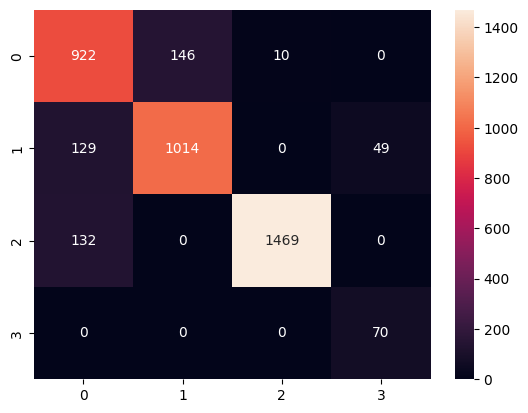

In [33]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelSVM, X_test, Y_test)

medidas['SVM'] = [precision, sensibilidad, exactitud, f1score]

## 3.5. Random Forest

In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
modelRF= RandomForestClassifier(n_estimators=100,  max_samples=0.8, criterion='gini',
                                max_depth=None, min_samples_leaf=2)

scores = cross_validate(modelRF, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

,fit_time,score_time,test_f1_weighted,test_accuracy,test_precision_weighted,test_recall_weighted
0,0.685873,0.031853,0.952590,0.952508,0.954022,0.952508
1,0.616307,0.031845,0.947167,0.947157,0.948694,0.947157
2,0.606129,0.032879,0.931135,0.931104,0.934459,0.931104
3,0.612002,0.031157,0.953212,0.953177,0.954690,0.953177
4,0.633640,0.031258,0.950433,0.950469,0.951912,0.950469
5,0.613514,0.032039,0.948453,0.948461,0.950309,0.948461
6,0.627126,0.031707,0.955164,0.955154,0.956681,0.955154
7,0.602817,0.030996,0.960664,0.960509,0.961661,0.960509
8,0.642092,0.033562,0.971895,0.971888,0.972393,0.971888
9,0.626742,0.031195,0.964507,0.964525,0.965375,0.964525


In [35]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

Promedio F1 Score: 0.95
Promedio Accuracy: 0.95
Promedio Precision: 0.96
Promedio Recall: 0.95


In [36]:
# Entrenamiento del modelo con el 70%
modelRF.fit(X_train, Y_train)

RandomForestClassifier(max_samples=0.8, min_samples_leaf=2)

******* Resultados de evaluación*******
Precisión: 0.9276845901238505
Sensibilidad: 0.9243846739406242
Exactitud: 0.9243846739406242
F1_Score: 0.9247175057526315
                     0            1            2          3  accuracy  \
precision     0.885770     0.877473     0.998673   0.804598  0.924385   
recall        0.848794     0.967282     0.940037   1.000000  0.924385   
f1-score      0.866888     0.920192     0.968468   0.891720  0.924385   
support    1078.000000  1192.000000  1601.000000  70.000000  0.924385   

             macro avg  weighted avg  
precision     0.891628      0.927685  
recall        0.939028      0.924385  
f1-score      0.911817      0.924718  
support    3941.000000   3941.000000  


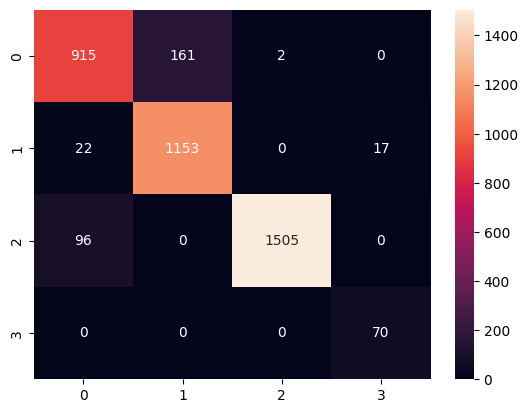

In [37]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelRF, X_test, Y_test)

medidas['Random Forest'] = [precision, sensibilidad, exactitud, f1score]

## 3.6. XGBoost

In [38]:
# Se instala la librería xgboost
# !pip install xgboost

In [39]:
from xgboost import XGBClassifier
modelXGB = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

scores = cross_validate(modelXGB, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

,fit_time,score_time,test_f1_weighted,test_accuracy,test_precision_weighted,test_recall_weighted
0,0.307120,0.013308,0.950472,0.950502,0.952545,0.950502
1,0.215778,0.012672,0.947065,0.947157,0.949458,0.947157
2,0.213046,0.012820,0.930311,0.930435,0.933591,0.930435
3,0.236907,0.013251,0.949058,0.949164,0.951619,0.949164
4,0.592135,0.012859,0.946392,0.946452,0.948273,0.946452
5,0.246458,0.013289,0.939651,0.939759,0.942280,0.939759
6,0.233993,0.021974,0.951076,0.951138,0.953078,0.951138
7,0.222746,0.012479,0.950400,0.950469,0.952396,0.950469
8,0.215895,0.012690,0.960479,0.960509,0.961628,0.960509
9,0.219626,0.012604,0.953092,0.953146,0.954838,0.953146


In [40]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

Promedio F1 Score: 0.95
Promedio Accuracy: 0.95
Promedio Precision: 0.95
Promedio Recall: 0.95


In [41]:
# Entrenamiento del modelo con el 70%
modelXGB.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

******* Resultados de evaluación*******
Precisión: 0.9298195700569701
Sensibilidad: 0.9253996447602132
Exactitud: 0.9253996447602132
F1_Score: 0.9257886973802311
                     0            1            2          3  accuracy  \
precision     0.902874     0.871642     1.000000   0.730337    0.9254   
recall        0.845083     0.979866     0.938788   0.928571    0.9254   
f1-score      0.873023     0.922591     0.968428   0.817610    0.9254   
support    1078.000000  1192.000000  1601.000000  70.000000    0.9254   

             macro avg  weighted avg  
precision     0.876213      0.929820  
recall        0.923077      0.925400  
f1-score      0.895413      0.925789  
support    3941.000000   3941.000000  


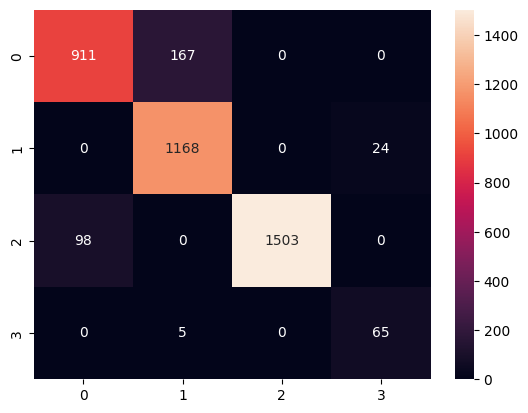

In [42]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelXGB, X_test, Y_test)

medidas['XGBoost'] = [precision, sensibilidad, exactitud, f1score]

## 3.7. Stacking

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

clasificadores= [('Tree', modelTree), ('KNN', modelKnn), ('RN', modelNN)]

metodo_ensamblador= LogisticRegression(multi_class='ovr')

modelStacking= StackingClassifier(estimators=clasificadores, final_estimator=metodo_ensamblador)

scores = cross_validate(modelStacking, X_train, Y_train, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), 
                        return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores)
scores

,fit_time,score_time,test_f1_weighted,test_accuracy,test_precision_weighted,test_recall_weighted
0,6.049219,0.148677,0.947936,0.947826,0.949301,0.947826
1,7.032371,0.123111,0.942444,0.942475,0.943921,0.942475
2,7.042439,0.130297,0.929914,0.929766,0.933060,0.929766
3,6.653214,0.097340,0.947778,0.947826,0.949679,0.947826
4,6.895399,0.147861,0.946409,0.946452,0.947987,0.946452
5,6.258441,0.108552,0.943645,0.943775,0.945596,0.943775
6,7.184215,0.099283,0.949141,0.949130,0.950735,0.949130
7,6.625060,0.100077,0.952559,0.952477,0.953674,0.952477
8,7.547682,0.116984,0.964541,0.964525,0.965122,0.964525
9,8.117346,0.129329,0.960393,0.960509,0.961529,0.960509


In [44]:
# Calcular los valores promedio de cada métrica
promedio_f1 = scores['test_f1_weighted'].mean()
promedio_accuracy = scores['test_accuracy'].mean()
promedio_precision = scores['test_precision_weighted'].mean()
promedio_recall = scores['test_recall_weighted'].mean()

# Imprimir los valores promedio
print("Promedio F1 Score: {:.2f}".format(promedio_f1))
print("Promedio Accuracy: {:.2f}".format(promedio_accuracy))
print("Promedio Precision: {:.2f}".format(promedio_precision))
print("Promedio Recall: {:.2f}".format(promedio_recall))

Promedio F1 Score: 0.95
Promedio Accuracy: 0.95
Promedio Precision: 0.95
Promedio Recall: 0.95


In [45]:
# Entrenamiento del modelo con el 70%
modelStacking.fit(X_train, Y_train)

StackingClassifier(estimators=[('Tree',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=2)),
                               ('KNN',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=3)),
                               ('RN',
                                MLPClassifier(activation='logistic',
                                              hidden_layer_sizes=5,
                                              learning_rate_init=0.2,
                                              max_iter=500, momentum=0.3,
                                              random_state=42))],
                   final_estimator=LogisticRegression(multi_class='ovr'))

******* Resultados de evaluación*******
Precisión: 0.926262200306422
Sensibilidad: 0.9233697031210353
Exactitud: 0.9233697031210353
F1_Score: 0.9234407334098176
                     0            1            2          3  accuracy  \
precision     0.892611     0.875094     0.992095   0.810127   0.92337   
recall        0.840445     0.975671     0.940662   0.914286   0.92337   
f1-score      0.865743     0.922650     0.965694   0.859060   0.92337   
support    1078.000000  1192.000000  1601.000000  70.000000   0.92337   

             macro avg  weighted avg  
precision     0.892482      0.926262  
recall        0.917766      0.923370  
f1-score      0.903287      0.923441  
support    3941.000000   3941.000000  


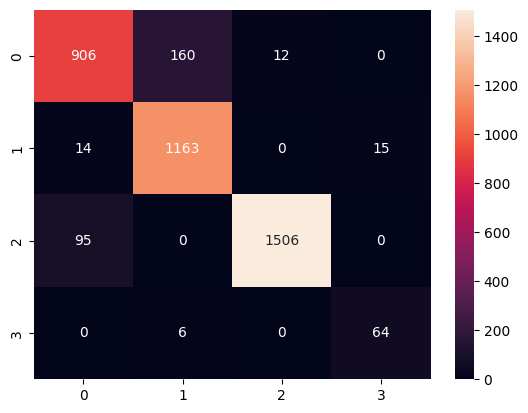

In [46]:
precision, sensibilidad, exactitud, f1score = evaluacion_modelos(modelStacking, X_test, Y_test)

medidas['Stacking'] = [precision, sensibilidad, exactitud, f1score]

# 4. Hiperparametrización de los 3 mejores modelos

In [47]:
medidas

,DecisionTree,KNN,Red Neuronal,SVM,Random Forest,XGBoost,Stacking
Precisión,0.929639,0.755536,0.885049,0.891522,0.927685,0.929820,0.926262
Sensibilidad,0.926668,0.734331,0.872367,0.881756,0.924385,0.925400,0.923370
Exactitud,0.926668,0.734331,0.872367,0.881756,0.924385,0.925400,0.923370
F1_Score,0.926887,0.740751,0.875697,0.884552,0.924718,0.925789,0.923441


La sensibilidad se centra en la capacidad del modelo para identificar positivos reales, es decir, casos de anemia. Es por esto que los mejores modelos se escogen a partir de esta métrica.

**Los modelos escogidos son: XGBoost, Random Forest y Stacking**

In [48]:
medidas_hiper = pd.DataFrame(index=['f1 de la CV'])

## 4.1. XGBoost

In [49]:
# XGBoost
from sklearn.model_selection import GridSearchCV

modelXGB_base = XGBClassifier()

# Definir los hiperparámetros
learning_rate = [0.01, 0.1, 0.2]
n_estimators = [50, 100, 200]
max_depth = [2, 4, 6]

# Grid
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=modelXGB_base, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

# Mejor modelo
modelXGB_Hiper = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas_hiper['XGBoost'] = grid.best_score_

# Mejores parámetros
print(grid.best_params_)

print(medidas_hiper)

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}
              XGBoost
f1 de la CV  0.949176


## 4.2. Random Forest

In [50]:
# RandomForest
modelRF_base = RandomForestClassifier()

# Definir los hiperparámetros
n_estimators = [50, 100, 200]
max_depth = [2, 4, 6]
min_samples_split = [2, 5, 10]

# Grid
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
grid = GridSearchCV(estimator=modelRF_base, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

# Mejor modelo
modelRF_Hiper = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas_hiper['Random Forest'] = grid.best_score_

# Mejores parámetros
print(grid.best_params_)

print(medidas_hiper)

{'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 200}
              XGBoost  Random Forest
f1 de la CV  0.949176       0.949888


## 4.3. Stacking

In [52]:
#Stacking
base_classifiers = [
    ('Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('RN', MLPClassifier())
]

# Definir los clasificadores finales
final_classifiers = [
    LogisticRegression(multi_class='ovr'),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    MLPClassifier()
]

# Definir los hiperparámetros
param_grid = {
    'final_estimator': final_classifiers
}

# Crear el modelo
stacking = StackingClassifier(estimators=base_classifiers)

# Crear el grid
grid = GridSearchCV(stacking, param_grid)

grid.fit(X_train, Y_train)

# Mejor modelo
modelStacking_Hiper = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas_hiper['Stacking'] = grid.best_score_

# Mejores parámetros
print(grid.best_params_)

print(medidas_hiper)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.1

{'final_estimator': MLPClassifier()}
              XGBoost  Random Forest  Stacking
f1 de la CV  0.949176       0.949888  0.944728


# 5. Guardar el mejor modelo

In [59]:
X = pd.get_dummies(X, drop_first=True, dtype='int64')
X

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
0,95.0,105.000000,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
1,113.0,51.335329,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0
2,121.0,0.000000,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1
3,121.0,51.335329,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0
4,108.0,0.000000,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,120.0,0.000000,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1
13132,120.0,51.335329,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1
13133,120.0,60.000000,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
13134,149.0,60.000000,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [60]:
X[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']]= min_max_scaler.transform(X[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])
X

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
0,0.535714,0.470852,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
1,0.664286,0.230203,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0
2,0.721429,0.000000,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1
3,0.721429,0.230203,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0
4,0.628571,0.000000,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,0.714286,0.000000,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1
13132,0.714286,0.230203,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1
13133,0.714286,0.269058,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
13134,0.921429,0.269058,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [62]:
# Se entrena el modelo con el 100% de los datos
modelRF_Hiper.fit(X, Y)

RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=200)

In [63]:
filename = 'data/modelo-hiperparametrizado.pkl'
variables= X.columns._values
pickle.dump([modelRF_Hiper,labelencoder,variables,min_max_scaler], open(filename, 'wb')) #write